1. pip install ipywidgets
2. unzip files (tar -xzf filename)
3. run notebook from directory of extracted files (e.g. jupyter notebook browse_images.ipynb)

In [44]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
import random
import os

In [45]:
#image->business_id->label_ids->label names maps

#image_id->business_id
imgs_file = os.path.join(os.curdir,"train_photo_to_biz_ids.csv")
a = np.loadtxt(imgs_file, dtype=np.dtype('string'), delimiter=",",skiprows=1)
img2biz = dict(a)

#business_id->list of label_ids
labels_file = os.path.join(os.curdir,"train.csv")
l = np.loadtxt(labels_file, dtype=np.dtype('string'), delimiter=",",skiprows=1)
biz2labels = dict([(x[0],x[1].split()) for x in l])

#label_id->name
labels = {'0':'good_for_lunch','1':'good_for_dinner','2':'takes_reservations','3':'outdoor_seating','4':'restaurant_is_expensive','5':'has_alcohol','6':'has_table_service','7'
:'ambience_is_classy','8':'good_for_kids'}


In [47]:
print labels[biz2labels[img2biz['89372']][1]]

has_alcohol


In [56]:
def browse_images(root, images):
    n = len(images)
    def view_image(i):
        file_only=images[i]
        image_file = os.path.join(root,file_only)
        image=mpimg.imread(image_file)
        plt.imshow(image)
        image_id=os.path.splitext(file_only)[0]
        business_labels = ', '.join([labels[x] for x in biz2labels[img2biz[image_id]]])
        title = 'Image file: %s. \nLabels: %s' % (image_file, business_labels)
        plt.title(title, y=1.08)
        plt.show()
    #interact(view_image, i=random.sample(range(0,100),5))
    interact(view_image, i=(0,n-1))

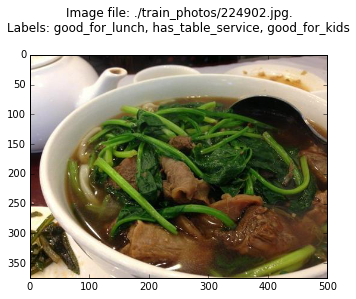

In [57]:
root = os.path.join(os.curdir,"train_photos")
images=os.listdir(root)
browse_images(root, images)